In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import json


In [261]:
range_1_1 = pd.read_json("full_path_without/fullPath1Interval1.json")
range_5_1 = pd.read_json("full_path_without/fullPath1Interval5.json")
range_10_1 = pd.read_json("full_path_without/fullPath1Interval10.json")
range_30_1 = pd.read_json("full_path_without/fullPath1Interval30.json")
range_60_1 = pd.read_json("full_path_without/fullPath1Interval60.json")
range_90_1 = pd.read_json("full_path_without/fullPath1Interval90.json")
range_120_1 = pd.read_json("full_path_without/fullPath1Interval120.json")

range_1_2 = pd.read_json("full_path_without/fullPath2Interval1.json")
range_5_2 = pd.read_json("full_path_without/fullPath2Interval5.json")
range_10_2 = pd.read_json("full_path_without/fullPath2Interval10.json")
range_30_2 = pd.read_json("full_path_without/fullPath2Interval30.json")
range_60_2 = pd.read_json("full_path_without/fullPath2Interval60.json")
range_90_2 = pd.read_json("full_path_without/fullPath2Interval90.json")
range_120_2 = pd.read_json("full_path_without/fullPath2Interval120.json")

range_1_3 = pd.read_json("full_path_without/fullPath3Interval1.json")
range_5_3 = pd.read_json("full_path_without/fullPath3Interval5.json")
range_10_3 = pd.read_json("full_path_without/fullPath3Interval10.json")
range_30_3 = pd.read_json("full_path_without/fullPath3Interval30.json")
range_60_3 = pd.read_json("full_path_without/fullPath3Interval60.json")
range_90_3 = pd.read_json("full_path_without/fullPath3Interval90.json")
range_120_3 = pd.read_json("full_path_without/fullPath3Interval120.json")

all_10 = [range_10_1, range_10_2, range_10_3]

all_sets = [range_1_1, range_5_1, range_10_1, range_30_1, range_60_1, range_90_1, range_120_1, range_1_2, range_5_2, 
            range_10_2, range_30_2, range_60_2, range_90_2, range_90_2, range_120_2, range_1_3, range_5_3, range_10_3,
            range_30_3, range_60_3, range_90_3, range_120_3]

def combine_sw_data_for(dataset1, dataset2, dataset3):
    cols = ['peerId', 'method', 'from', 'url', 'loadTime', 'currentTime']
    result = pd.DataFrame(columns=cols);
    for index, peer in enumerate(range_10_1['result']):
        stats1 = dataset1['result'][index]['swStats']
        stats2 = dataset2['result'][index]['swStats']
        stats3 = dataset3['result'][index]['swStats']
        if(index == 29):
            #print(stats1)
            continue
        df1 = pd.DataFrame(stats1, columns=cols)
        df2 = pd.DataFrame(stats2, columns=cols)
        df3 = pd.DataFrame(swStats3, columns=cols)
        result = pd.concat([result, df1, df2, df3])
    return result

all_sw_1 = combine_sw_data_for(range_1_1, range_1_2, range_1_3)
all_sw_5 = combine_sw_data_for(range_5_1, range_5_2, range_5_3)
all_sw_10 = combine_sw_data_for(range_10_1, range_10_2, range_10_3)
all_sw_30 = combine_sw_data_for(range_30_1, range_30_2, range_30_3)
all_sw_60 = combine_sw_data_for(range_60_1, range_60_2, range_60_3)
all_sw_90 = combine_sw_data_for(range_90_1, range_90_2, range_90_3)
all_sw_120 = combine_sw_data_for(range_120_1, range_120_2, range_120_3)
all_sw_sets = [all_sw_1, all_sw_5, all_sw_10, all_sw_30, all_sw_60, all_sw_90, all_sw_120]

ranges_labels = ["1 Sekunde","5 Sekunden", "10 Sekunden", "30 Sekunden", "60 Sekunden", "90 Sekunden", "120 Sekunden"]
ranges_index = [1, 5, 10, 30, 60, 90, 120]
sWcols = ['peerId', 'method', 'from', 'url', 'loadTime', 'currentTime']

[[347.3333333333333, 812.6666666666666], [380.3333333333333, 779.6666666666666], [380.6666666666667, 779.3333333333334], [391.6666666666667, 767.6666666666666], [398.0, 760.6666666666666], [396.0, 762.0], [397.0, 760.3333333333334]]


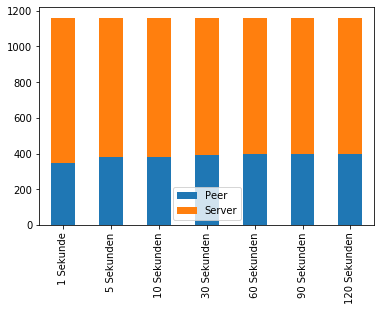

In [262]:

def plot_stacked(datasets, labels, filename):
    headers = ['Peer', 'Server']
    cols = ['peerId', 'method', 'from', 'url', 'loadTime', 'currentTime']

    result = []
    for dataset in datasets:
        grouped = dataset.groupby('method').size()/3
        result.append([grouped[0], grouped[1]])

    print(result)
    df_grouped = pd.DataFrame(result, columns=headers, index=labels)

    df_grouped.plot(kind='bar', stacked=True)
    plt.savefig(filename + '.pdf')
plot_stacked(all_sw_sets, ranges_labels, 'sc_stacked_interval')

[[435.0, 5490.333333333333], [2749.6666666666665, 110.33333333333333]]


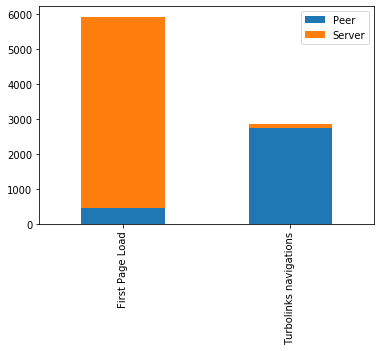

In [263]:
courses_nav = range_5_1['result'][0]['navigationsStart']['/courses/']
def filter_first_load(time):
    def func(row):
        return row['currentTime'] < time
    return func
    
def filter_turbo_load(time):
    def func(row):
        return row['currentTime'] >= time
    return func

def filter_sw_stats_for(datasets, func):
    
    result = pd.DataFrame(columns=sWcols)

    for dataset in datasets:
        res = dataset['result']
        for peer in res.values:
            start = peer['navigationsStart']['/courses/']
            swStats = filter(func(start), peer['swStats'])
            df = pd.DataFrame(swStats, columns=sWcols)
            result = pd.concat([result, df])
    return result

first_loads = filter_sw_stats_for(all_sets, filter_first_load)
turbo_loads = filter_sw_stats_for(all_sets, filter_turbo_load)

plot_stacked([first_loads, turbo_loads], ['First Page Load', 'Turbolinks navigations'], 'sc_first_vs_later')


# Timeouts

             peerId          method    from  \
36  dcd58d58-d5c9-4  serverResponse  server   
37  dcd58d58-d5c9-4  serverResponse  server   
38  dcd58d58-d5c9-4  serverResponse  server   
36  dcd58d58-d5c9-4  serverResponse  server   
37  dcd58d58-d5c9-4  serverResponse  server   
..              ...             ...     ...   
37  dcd58d58-d5c9-4  serverResponse  server   
38  dcd58d58-d5c9-4  serverResponse  server   
36  dcd58d58-d5c9-4  serverResponse  server   
37  dcd58d58-d5c9-4  serverResponse  server   
38  dcd58d58-d5c9-4  serverResponse  server   

                                                  url  loadTime    currentTime  
36  https://hackathon.schul-cloud.org/scripts/jque...  3178.450  1567526597486  
37  https://hackathon.schul-cloud.org/scripts/topi...  3180.585  1567526597491  
38  https://hackathon.schul-cloud.org/scripts/cour...  3186.680  1567526597495  
36  https://hackathon.schul-cloud.org/scripts/jque...  3178.450  1567526597486  
37  https://hackathon.schul-cl

Text(0, 0.5, '#Timeouts')

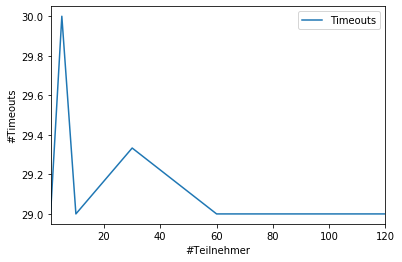

In [271]:
result = []
for i, dataset in enumerate(all_sw_sets):
    # grouped = dataset.groupby('method').size()
    #dataset = dataset.loc[data['method'] == 'serverResponse']
    serverResponses = dataset.loc[dataset['method'] == 'serverResponse']
    mask = serverResponses['loadTime'] >= 3000
    timeouts = [serverResponses[mask]['loadTime'].size/3]
    print(serverResponses[mask])
    result.append(timeouts)
print(result)

test = pd.DataFrame(result, index=ranges_index, columns=['Timeouts']) 
plot = test.plot()
plot.set_xlabel("#Teilnehmer")
plot.set_ylabel("#Timeouts")

# Request Load Times Sw

In [265]:
data = pd.concat(all_sw_sets)
serverResponses = data.loc[data['method'] == 'serverResponse']
peerResponses = data.loc[data['method'] == 'peerResponse']

print(serverResponses['loadTime'].describe())

print(peerResponses['loadTime'].describe())

count    16267.000000
mean       414.346491
std        582.671892
min         15.420000
25%        228.270000
50%        239.140000
75%        311.640000
max       4265.535000
Name: loadTime, dtype: float64
count    8073.000000
mean      145.828686
std       373.258056
min         7.200000
25%        43.790000
50%        58.690000
75%        96.760000
max      3409.430000
Name: loadTime, dtype: float64


# Navigation Timings

In [266]:
res = all_sets[3]['result']
data = pd.concat(all_sets)

print(data['result'][0])

resultCols = ['peerId', 'timeout', 'clientData', 'loadingTimes', 'swStats', 'requestTimings', 'navigationsStart']
df_2 = pd.DataFrame(all_sets[3], columns=['runNum', 'interval', 'result'])
print(df_2['result'][4]['loadingTimes'][1])
df_3 = pd.DataFrame(df_2, columns=resultCols)
print(df_3)

0    {'peerId': 24, 'timeout': 713, 'clientData': {...
0    {'peerId': 3, 'timeout': 164, 'clientData': {'...
0    {'peerId': 3, 'timeout': 48, 'clientData': {'s...
0    {'peerId': 20, 'timeout': 266, 'clientData': {...
0    {'peerId': 11, 'timeout': 6556, 'clientData': ...
0    {'peerId': 14, 'timeout': 50, 'clientData': {'...
0    {'peerId': 13, 'timeout': 1114, 'clientData': ...
0    {'peerId': 14, 'timeout': 32, 'clientData': {'...
0    {'peerId': 9, 'timeout': 2, 'clientData': {'se...
0    {'peerId': 27, 'timeout': 209, 'clientData': {...
0    {'peerId': 20, 'timeout': 542, 'clientData': {...
0    {'peerId': 8, 'timeout': 3547, 'clientData': {...
0    {'peerId': 7, 'timeout': 6043, 'clientData': {...
0    {'peerId': 7, 'timeout': 6043, 'clientData': {...
0    {'peerId': 24, 'timeout': 8294, 'clientData': ...
0    {'peerId': 24, 'timeout': 18, 'clientData': {'...
0    {'peerId': 22, 'timeout': 113, 'clientData': {...
0    {'peerId': 0, 'timeout': 142, 'clientData': {'...
0    {'pee